DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that is typically used for non-circular data in spatial datasets. It defines clusters as dense regions of data points separated by areas of lower point density. DBSCAN is effective at identifying clusters with varying shapes and sizes in Euclidean space.

However, when dealing with circular or directional data, DBSCAN may not be the most suitable choice because it relies on the concept of "distance" between data points in Euclidean space. Circular data, which is inherently periodic, requires a different approach.

To apply DBSCAN to circular data, you need to transform the data into a format that accounts for its circular nature. One common approach is to work with angles directly and use circular distance metrics. Here are the key steps to adapt DBSCAN for circular data:

- Data Transformation: Convert the circular data (angles or directions) into Cartesian coordinates (sine and cosine components) to calculate distances in a circular manner.

- Distance Metric: Define a custom distance metric that calculates the circular distance between data points. The circular distance metric should account for the periodicity of the data. One commonly used metric is the angular difference between two points.

- Apply DBSCAN: Use the transformed data and the custom distance metric to apply DBSCAN. You can use the sklearn.cluster.DBSCAN class with a custom distance metric as a callable function.


Import the necessary libraries and load the Iris dataset.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()


Create a DataFrame to work with the dataset and explore its contents.

In [2]:
# Create a DataFrame from the Iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Display the first few rows of the DataFrame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Import the DBSCAN algorithm from scikit-learn and apply it to the dataset.

In [3]:
from sklearn.cluster import DBSCAN

# Create a DBSCAN instance
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the data and obtain cluster labels
cluster_labels = dbscan.fit_predict(df)


Visualize the clustering results and compare them with the ground truth (actual class labels).

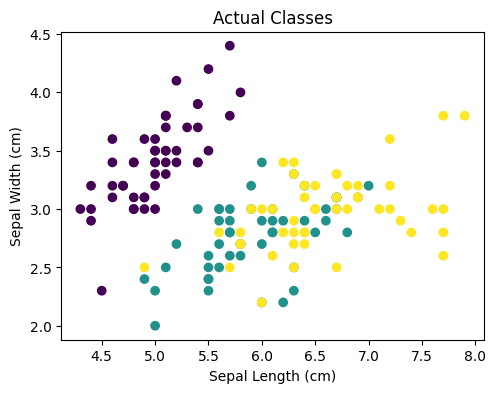

In [4]:
import matplotlib.pyplot as plt

# Plot the actual classes
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=iris.target, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Actual Classes')

plt.show()


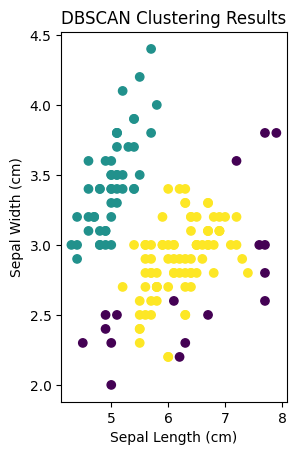

In [5]:
# Plot the DBSCAN clustering results
plt.subplot(1, 2, 2)
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=cluster_labels, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('DBSCAN Clustering Results')

plt.show()

Evaluate the clustering results

Since DBSCAN does not require a predefined number of clusters, it assigns noise points as -1 and groups the rest. You can analyze the cluster assignments and the number of noise points.

In [6]:
# Count the number of clusters (excluding noise points)
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# Count the number of noise points (points labeled as -1)
num_noise_points = list(cluster_labels).count(-1)

# Display the cluster information
print(f'Number of clusters: {num_clusters}')
print(f'Number of noise points: {num_noise_points}')


Number of clusters: 2
Number of noise points: 17
